<a href="https://colab.research.google.com/github/RakshithSuresh/ML-Projects/blob/main/Weight_Prediction_using_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [187]:
# reading the data
df = pd.read_csv('Synthetic_People_Dataset.csv')
df.head()

,Height (m),Favorite Color,Gender,Weight (kg)
0,1.70,Green,Male,98.0
1,1.64,Blue,Male,99.4
2,1.71,Red,Female,89.1
3,1.80,Blue,Female,88.9
4,1.63,Green,Female,80.5


In [188]:
# standardizing the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,height_(m),favorite_color,gender,weight_(kg)
0,1.70,Green,Male,98.0
1,1.64,Blue,Male,99.4
2,1.71,Red,Female,89.1
3,1.80,Blue,Female,88.9
4,1.63,Green,Female,80.5


In [189]:
# checking for missing values
df.isnull().sum()

,0
height_(m),0
favorite_color,0
gender,0
weight_(kg),0


In [190]:
df['favorite_color'].value_counts()

,count
favorite_color,
Green,3376
Red,3330
Blue,3294


In [191]:
df.describe()

,height_(m),weight_(kg)
count,10000.000000,10000.000000
mean,1.649783,87.629980
std,0.100410,8.688536
min,1.260000,54.000000
25%,1.580000,81.700000
50%,1.650000,87.600000
75%,1.720000,93.700000
max,2.040000,127.200000


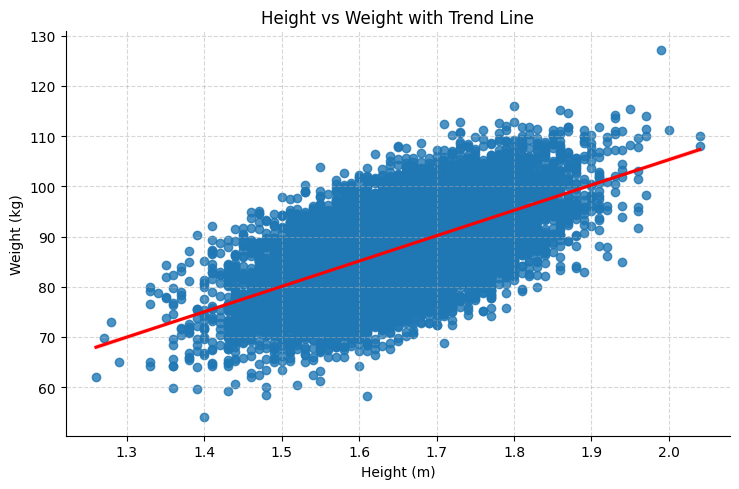

In [192]:
# visualizing the relationship between height and weight
sns.lmplot(x='height_(m)', y='weight_(kg)', data=df, aspect=1.5, line_kws={'color': 'red'})
plt.title('Height vs Weight with Trend Line')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

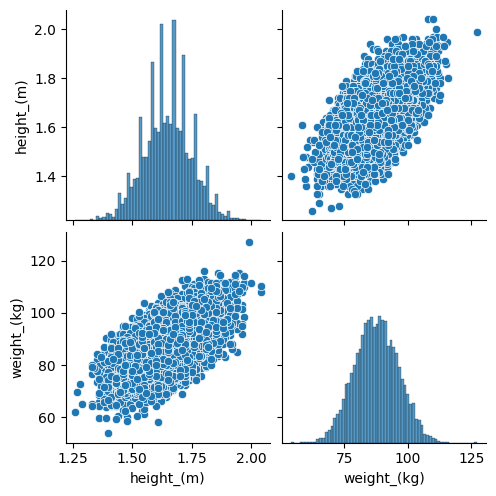

In [193]:
sns.pairplot(df, vars=['height_(m)', 'weight_(kg)'])

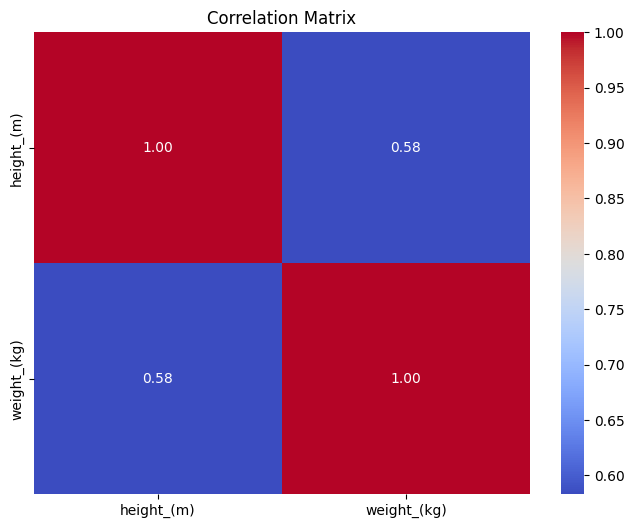

In [194]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='gender', ylabel='count'>

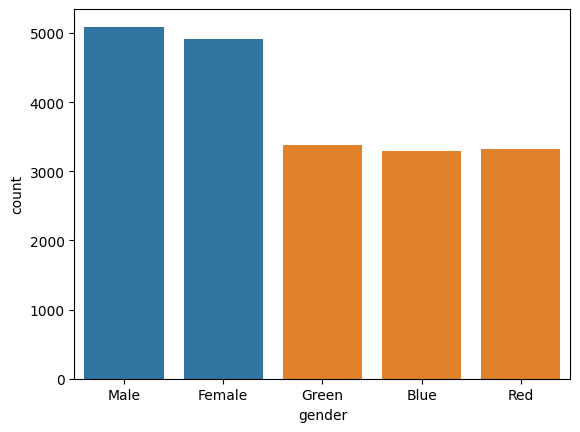

In [195]:
sns.countplot(x='gender', data=df)
sns.countplot(x='favorite_color', data=df)

Text(0, 0.5, 'Frequency')

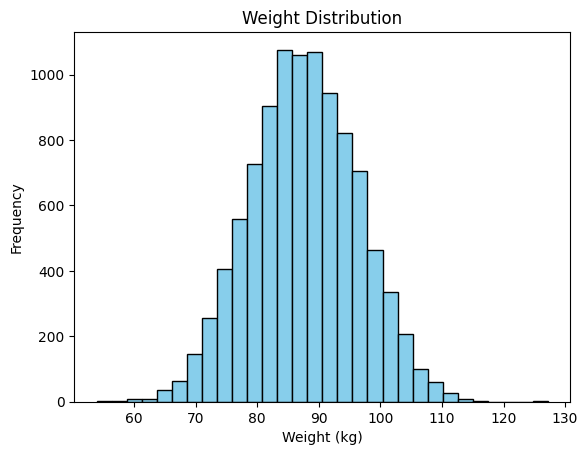

In [196]:
plt.hist(df['weight_(kg)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

<Axes: xlabel='gender', ylabel='weight_(kg)'>

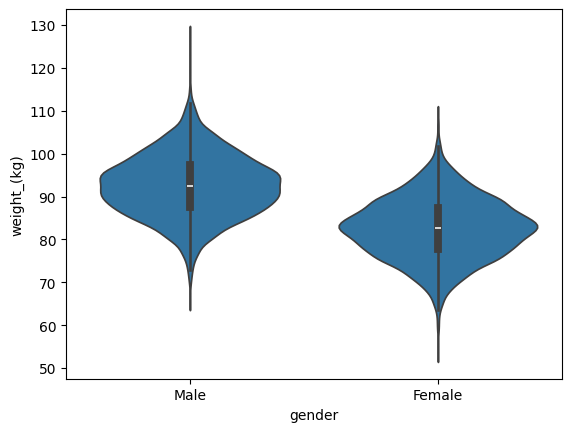

In [197]:
sns.violinplot(x='gender', y='weight_(kg)', data=df)


In [198]:
# encoding color and gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['colorEncoded'] = le.fit_transform(df['favorite_color'])
df['genderEncoded'] = le.fit_transform(df['gender'])
df.head()

,height_(m),favorite_color,gender,weight_(kg),colorEncoded,genderEncoded
0,1.70,Green,Male,98.0,1,1
1,1.64,Blue,Male,99.4,0,1
2,1.71,Red,Female,89.1,2,0
3,1.80,Blue,Female,88.9,0,0
4,1.63,Green,Female,80.5,1,0


# Building the Model

In [200]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Features and Target
X = df[['height_(m)', 'colorEncoded', 'genderEncoded']]
y = df['weight_(kg)']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define parameter grid and base model
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'max_leaf_nodes': [None, 8, 12]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Step 4: Fit Grid Search
grid_search.fit(X_train, y_train)

# Step 5: Use best model from search
gbr = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


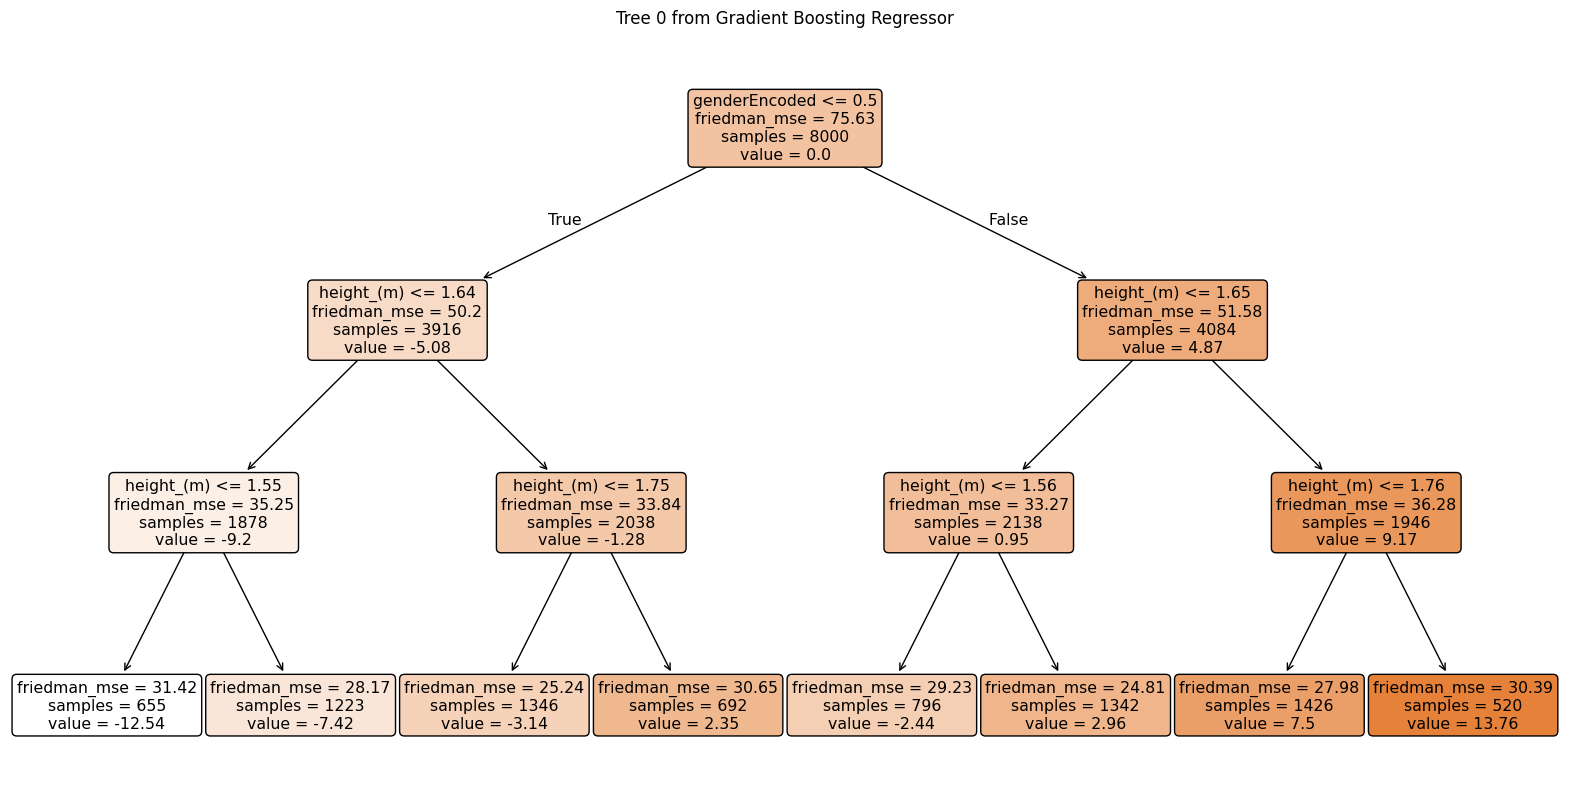

In [202]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first tree in the ensemble (estimator 0)
plt.figure(figsize=(20, 10))
plot_tree(
    gbr.estimators_[0, 0],  # Access first tree for the first output (regression)
    feature_names=X.columns,
    filled=True,
    rounded=True,
    precision=2
)
plt.title("Tree 0 from Gradient Boosting Regressor")
plt.show()

In [203]:
from sklearn.tree import export_text

tree_rules = export_text(gbr.estimators_[0, 0], feature_names=list(X.columns))
print(tree_rules)

|--- genderEncoded <= 0.50
|   |--- height_(m) <= 1.64
|   |   |--- height_(m) <= 1.55
|   |   |   |--- value: [-12.54]
|   |   |--- height_(m) >  1.55
|   |   |   |--- value: [-7.42]
|   |--- height_(m) >  1.64
|   |   |--- height_(m) <= 1.75
|   |   |   |--- value: [-3.14]
|   |   |--- height_(m) >  1.75
|   |   |   |--- value: [2.35]
|--- genderEncoded >  0.50
|   |--- height_(m) <= 1.65
|   |   |--- height_(m) <= 1.56
|   |   |   |--- value: [-2.44]
|   |   |--- height_(m) >  1.56
|   |   |   |--- value: [2.96]
|   |--- height_(m) >  1.65
|   |   |--- height_(m) <= 1.76
|   |   |   |--- value: [7.50]
|   |   |--- height_(m) >  1.76
|   |   |   |--- value: [13.76]



In [204]:
# Step 4: Predict
y_pred = gbr.predict(X_test)

In [205]:
# Step 5: Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

MAE  = 4.03
MSE  = 25.43
RMSE = 5.04
R²   = 0.66


In [206]:
# Create a copy of test features
comparison_df = X_test.copy()

# Add actual target values
comparison_df['Actual_Weight'] = y_test.values

# Add predicted target values
comparison_df['Predicted_Weight'] = y_pred

# Round predictions for easier viewing (optional)
comparison_df['Predicted_Weight'] = comparison_df['Predicted_Weight'].round(1)

# Show first 20 rows
comparison_df.head(20)

,height_(m),colorEncoded,genderEncoded,Actual_Weight,Predicted_Weight
6252,1.91,2,1,106.9,104.9
4684,1.55,1,1,87.2,87.4
1731,1.62,1,1,88.2,90.6
4742,1.65,2,0,80.0,82.8
4521,1.76,2,0,90.4,87.9
6340,1.56,1,1,95.2,87.4
576,1.67,0,1,90.2,93.5
5202,1.66,0,1,89.7,93.1
6363,1.72,2,1,97.5,96.3
439,1.64,2,1,95.3,92.4


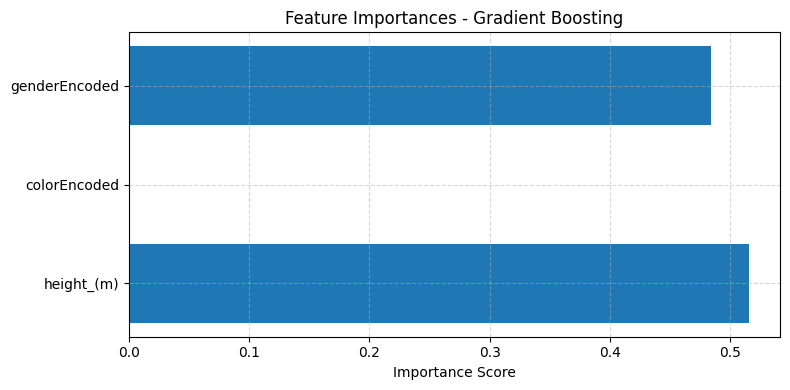

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(X.columns, gbr.feature_importances_)
plt.xlabel('Importance Score')
plt.title('Feature Importances - Gradient Boosting')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [208]:
# Error analysis
comparison_df['Error'] = abs(comparison_df['Actual_Weight'] - comparison_df['Predicted_Weight'])
comparison_df.sort_values(by='Error', ascending=False).head(10)


,height_(m),colorEncoded,genderEncoded,Actual_Weight,Predicted_Weight,Error
871,1.57,1,1,66.1,88.4,22.3
2492,1.60,0,1,71.6,90.3,18.7
6843,1.56,1,1,70.0,87.4,17.4
9569,1.61,2,0,97.3,80.2,17.1
8287,1.55,2,1,71.7,87.4,15.7
1022,1.65,1,1,108.1,92.4,15.7
290,1.63,2,0,96.6,81.6,15.0
4210,1.62,0,0,66.4,81.4,15.0
2275,1.54,1,0,62.5,77.4,14.9
9942,1.85,0,0,108.5,93.7,14.8


# 📘 ML Regression Project: Predicting Weight Using Gradient Boosting

---

## 🧠 Objective
To build a machine learning regression model that predicts a person's **weight (kg)** based on:
- Height (m)
- Gender
- Favorite Color (for noise feature exploration)

---

## 🧾 Dataset
- **Size**: 10,000 synthetic records
- **Features**:
  - `height_(m)` — continuous
  - `gender` — categorical (`Male` / `Female`)
  - `favorite_color` — categorical (`Red`, `Blue`, `Green`)
- **Target**: `weight_(kg)` — continuous

---

## 🔍 Exploratory Data Analysis (EDA)
- ✅ Height and weight are strongly correlated (positive trend)
- ✅ Gender influences weight (males weigh slightly more)
- ❌ Favorite color has no real impact (noise feature)
- ✅ No multicollinearity observed (confirmed by heatmap)

---

## ⚙️ Feature Engineering
- Used `LabelEncoder` for:
  - `gender` → `genderEncoded`
  - `favorite_color` → `colorEncoded`

- Final features used for modeling:
  - `height_(m)`
  - `genderEncoded`
  - `colorEncoded`

---

## 🚀 Model Used: Gradient Boosting Regressor

```python
GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

## 📈 Initial Model Performance (Before Tuning)

- MAE  ≈ 4.04 kg
- RMSE ≈ 5.05 kg
- R²   ≈ 0.66

---

## 🧪 Hyperparameter Tuning (GridSearchCV)

Parameters tested:
- `learning_rate`: [0.05, 0.1]  
- `n_estimators`: [100, 200]  
- `max_depth`: [3, 4]  
- `max_leaf_nodes`: [None, 8, 12]

---

✅ Best Parameters:

{
    'learning_rate': 0.05,
    'max_depth': 4,
    'max_leaf_nodes': 8,
    'n_estimators': 100
}


## 🎯 Final Model Evaluation (on Test Set)

| Metric | Value   |
|--------|---------|
| MAE    | 4.03 kg |
| RMSE   | 5.04 kg |
| R²     | 0.66    |

✅ The final model is well-tuned and generalizes with good accuracy.

---

## 📊 Feature Importance

| Feature         | Importance |
|-----------------|------------|
| `height_(m)`    | ~0.50      |
| `genderEncoded` | ~0.45      |
| `colorEncoded`  | ~0.05      |

🔍 The model correctly ignored favorite color as an irrelevant feature.

---

## ❗ Error Analysis

- Most prediction errors fall within **±5 kg**  
- Outliers appeared in **extreme height/weight combinations**  
- Model handled noise features **robustly**, like `colorEncoded`, showing its ability to ignore irrelevant variables

---

## ✅ Conclusion

- ✅ Built an end-to-end ML pipeline: **EDA → Preprocessing → Modeling → Tuning → Evaluation**  
- ✅ Gradient Boosting effectively captured **non-linear relationships** between features and weight  
- ✅ Model successfully learned to **ignore irrelevant features** (e.g., color) and focus on signal  
- ✅ Final model is **tuned, interpretable, and accurate**, with strong performance metrics  
- ✅ Ready for **deployment**, **presentation**, or inclusion in your **ML portfolio**



# 🔹 GENERAL PROJECT QUESTIONS

**1. What problem were you solving?**  
✅ “I was predicting a person’s weight based on physical attributes using regression.”

**2. Why did you choose Gradient Boosting over other models?**
- Handles non-linear relationships
- Performs well with default parameters
- Handles both numerical and categorical data (after encoding)
- Offers built-in feature importance for interpretability

**3. How did you generate or clean your data?**
- Generated synthetic data: height + gender → weight
- Encoded categorical variables (`gender`, `color`)
- Checked distributions, missing values, and outliers

**4. What features did you use, and why?**
- `height_(m)`: Primary driver of weight
- `gender`: Explains variance in weight
- `color`: Intentionally added as noise to test model robustness

**5. How did you evaluate your model’s performance?**
- Used MAE, RMSE, and R²
- R² to explain variance captured by model
- Visualized predictions vs actuals; analyzed top errors

---

# 🔹 ALGORITHMIC QUESTIONS

**6. What is Gradient Boosting, and how does it work?**
- Ensemble of weak learners (small decision trees)
- Each new tree corrects errors of the previous one
- Uses gradient descent to minimize loss (e.g., MSE)

**7. How does it decide where to split?**
- Evaluates all features and thresholds
- Chooses the split that minimizes weighted MSE

**8. What does the learning rate do?**
- Controls how much each tree influences the model
- Lower values = more stable learning, less overfitting

**9. What are `n_estimators`, `max_depth`, and `max_leaf_nodes`?**
- `n_estimators`: Number of boosting rounds (more = lower bias)
- `max_depth`: Tree complexity (how deep each tree can go)
- `max_leaf_nodes`: Caps how many final decisions each tree can make (limits overfitting)

---

# 🔹 HYPERPARAMETER TUNING

**10. How did you choose the best parameters?**
- Used GridSearchCV with cross-validation
- Evaluated using negative MSE
- Chose best set based on lowest RMSE

**11. Why not use Random Forest or Linear Regression?**
- Linear regression cannot capture non-linear relationships
- Random Forest is good, but GBM can outperform it with tuning

---

# 🔹 INTERPRETABILITY

**12. Which feature was most important?**
- `height_(m)` and `gender` had the highest importance
- `color` had near-zero — model correctly ignored it

**13. How did you interpret the model’s output?**
- Used feature importance plot
- Visualized predictions vs actual weights
- Sorted and analyzed top error cases

---

# 🔹 BONUS / ADVANCED

**14. How would you improve this model?**
- Add more meaningful features (e.g., BMI, activity level)
- Use real-world data if available
- Try XGBoost or LightGBM
- Use Bayesian optimization for hyperparameter tuning

**15. What’s one thing you would’ve done differently?**
- Add more cross-validation earlier
- Try removing noise features earlier
- Clean code more modularly

---

## ✅ Ready-to-Say 30-Second Summary

“I created a regression model using Gradient Boosting to predict weight from physical features like height and gender. I performed EDA, encoded features, trained and tuned the model using GridSearchCV, and achieved strong results with RMSE ~5kg and R² ~0.66.”
